In [ ]:
# RINEX 4 MAY - MAJOR PROJECT 1 - Choose any dataset and apply suitable ML technique
# developed by Anuvab Chakravarty
# Dataset used - stored text messages 

In [ ]:
# SUPPORT VECTOR CLASSIFIER
# SPAM - HAM MODEL
# Dataset - https://raw.githubusercontent.com/diazoniclabs/Machine-Learning-using-sklearn/master/Datasets/spam.tsv

In [ ]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/diazoniclabs/Machine-Learning-using-sklearn/master/Datasets/spam.tsv',sep='\t')
print(df)

     label                                            message  length  punct
0      ham  Go until jurong point, crazy.. Available only ...     111      9
1      ham                      Ok lar... Joking wif u oni...      29      6
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...     155      6
3      ham  U dun say so early hor... U c already then say...      49      6
4      ham  Nah I don't think he goes to usf, he lives aro...      61      2
...    ...                                                ...     ...    ...
5567  spam  This is the 2nd time we have tried 2 contact u...     160      8
5568   ham               Will ü b going to esplanade fr home?      36      1
5569   ham  Pity, * was in mood for that. So...any other s...      57      7
5570   ham  The guy did some bitching but I acted like i'd...     125      1
5571   ham                         Rofl. Its true to its name      26      1

[5572 rows x 4 columns]


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB
None


In [ ]:
#to find the number of spam and ham messages
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

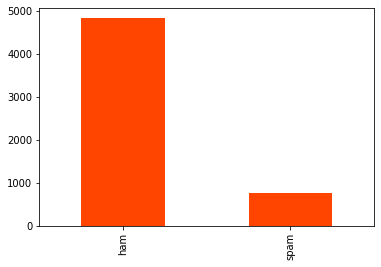

In [ ]:
#Visualization
df['label'].value_counts().plot(kind='bar',color='orangered')

In [ ]:
# To divide data into input and output
x=df.iloc[:,1].values
#only when text messages are involved, input is 1-dimensional
y=df.iloc[:,0].values
# Train, test and split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)
# Apply Tfidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect=TfidfVectorizer()
x_train_v=vect.fit_transform(x_train)
#for training data it is vect.fit_transform
x_test_v=vect.transform(x_test)
#for testing data it is vect.transform

In [ ]:
# Apply SVC
from sklearn.svm import SVC
model=SVC()
model.fit(x_train_v,y_train)
y_pred=model.predict(x_test_v)
print('The predicted values are:',y_pred)
print('The actual values are:',y_test)

The predicted values are: ['ham' 'spam' 'ham' ... 'ham' 'ham' 'ham']
The actual values are: ['ham' 'spam' 'ham' ... 'spam' 'ham' 'ham']


In [ ]:
# Testing accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)*100

98.56424982053123

In [ ]:
b=df['message'][12]
b=vect.transform([b])
model.predict(b)

array(['spam'], dtype=object)

In [ ]:
# Evaluating by taking custom messages as input
c='win free tickets'
c=vect.transform([c])
model.predict(c)

array(['spam'], dtype=object)

In [ ]:
# Pipelining
from sklearn.pipeline import make_pipeline
text_model=make_pipeline(TfidfVectorizer(),SVC())
text_model.fit(x_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()), ('svc', SVC())])

In [ ]:
# Predictor variable
y_pred1=text_model.predict(x_test)
accuracy_score(y_pred1,y_test)*100

98.56424982053123

In [ ]:
a1=df['message'][2]
text_model.predict([a1])

array(['spam'], dtype=object)

In [ ]:
# Joblib has 2 types - Dump and Load
import joblib
joblib.dump(text_model,'spam-ham')
#a new file called spam-ham is created and pipelined model is dumped in it

['spam-ham']

In [ ]:
#CREATING A WEB APP USING STREAMLIT
!pip install streamlit --quiet #Installing the streamlit library

In [ ]:
%%writefile app.py
#%%writefile app.py is a magic command which creates a file named app.py
import streamlit as st
import joblib
model_nb=joblib.load('spam-ham')
st.title('SPAM-HAM CLASSIFIER') #creates a title with name spam-ham classifier
ip=st.text_input('Enter the Message:') #creates a text box
op=model_nb.predict([ip])
if st.button('Predict'):
  st.title(op[0]) #prints the output as spam or ham

In [ ]:
# TEMPORARY DEPLOYMENT
!streamlit run app.py & npx localtunnel --port 8501
#8501 is the default port number for local tunnel
# PERMANENT DEPLOYMENT
# Link to the web app: https://spam-hash-anuvabc.herokuapp.com/